# Kelly criterion in continuous time

In this notebook we will see an introduction for the Kelly criterion in continuous time and it's uses for the stock market.

The notebook is divided in 4 sections:

1. **Introduction to the Kelly criterion in continuous time.**
2. **One example with one security, we will use the S&P 500.**
3. **One example with multiple securities.**
4. **Discussion, problems and further analysis.**

## 1. Introduction to Kelly criterion in continuous time

There have been many papers and books written about the Kelly criteria and its characteristics. Here, I will just focus on some of the main relevant aspects for the Kelly criterion in continuous time. This notebook's aim is to serve as a starting point to understand and apply the Kelly criterion in the stock market. Personally, I find the Kelly criterion fascinating for it's simplicity, elegance and utility.

We saw in a previous [post](https://blog.karanchawla.me/posts/2020-10-18/the-kelly-criterion) some of it's main characteristics for both discrete and continuous variables. 

### Background


The Kelly criterion is a very usefull method for determining the betting size or the investment allocation in a security  and it has being used for many succesfuls investors in history, such as [Edward O. Thorp](https://en.wikipedia.org/wiki/Edward_O._Thorp) and [Bill Gross](https://en.wikipedia.org/wiki/Bill_H._Gross).

One of the first problems invented in history related with bet sizing was the [St. Petersburg paradox](https://en.wikipedia.org/wiki/St._Petersburg_paradox), invented by Nicolas Bernoulli in 1713 who later discovered the solution. This problem tries to find out the betting size for an infinite expected payoff. 

The Kelly criterion was first described by [Jhon Kelly](https://en.wikipedia.org/wiki/John_Larry_Kelly_Jr.), in 1956, in his paper [_A New Interpretation of Information Rate_](http://ieeexplore.ieee.org/document/6771227/). J. Kelly got his idea from his collegue [Shannon](https://en.wikipedia.org/wiki/Claude_Shannon), also known as the father of information theory. In his book [_“Fortune’s Formula: The Untold Story of the Scientific Betting System That Beat the Casinos and Wall Street”_](https://books.google.co.uk/books/about/Fortune_s_Formula.html?id=ywLao52cY08C&redir_esc=y) William Poundstone tells how both Shannon and the mathematician Edward Thorp used the Kelly criterion to win in the casinos and in the stock market. 

### Continuous variables


"*The Kelly criterion maximizes the expected value of the logarithm of wealth period by period.*" And it can be used in any scenario where there is a probability of return/payoff for a given investment/bet. 


### Solving the problem

There are various ways to get the optimal allocation, here we will use the technique that Thorp uses in [_“The Kelly Criterion in Blackjack, Sports Betting, and the Stock Market“_](https://www.researchgate.net/publication/247922818_The_Kelly_Criterion_in_Blackjack_Sports_Betting_and_the_Stock_Market).


Let's suppose that we have a random variable $X$ representing some assets returns with $E(X)=m$ and $Var(X)=s^2$ following a Bernoulli with probability:

\begin{equation}
P\left(X = m  + s\right) = P\left(X = m - s\right) = 0.5
\end{equation}

Having an initial capital of $V_0$, a given allocation $f$ and a risk-free return (for example, treasury bills) $r$ we have:

\begin{equation}
V(f) = V_0\left(1 + (1 - f)r + fX \right)
\end{equation}

Or what is the same:

\begin{equation}
V(f) = V_0\left(1 + r + f(X - r) \right)
\end{equation}

If we calculate the expected logarithm returns of $V(f)/V_0$ then:

\begin{equation}
g(f) = E\left[\log(\frac{V(f)}{V_0})) = 0.5 \log\left(1 + r + f(m - r + s)\right) + 0.5 \log(1 + r + f(m - r - s)\right]
\end{equation}

If we separate the time interval into $n$ equal independent steps and keeping the constant the same total $m$ and variance $s^2$ so $(\frac{\mu}{n}, \frac{\sigma^2}{n})$, we get:

\begin{equation}
P\left(X_i = \frac{m}{n} + \frac{\sigma}{\sqrt{n}}\right) = P\left(X_i = \frac{m}{n} - \frac{\sigma}{\sqrt{n}}\right) = 0.5
\end{equation}

So:

\begin{equation}
\frac{V_n(f)}{V_0} = \prod_{i=1}^n\left(1 + \frac{r}{n} + f(X_i - \frac{m}{n})\right)
\end{equation}

The interesting part is that the limit $V_\infty (f)$ of $V_n(f)$ when $n \to \infty$ corresponds to a lognormal diffusion proccess. Taking logarithms of the expected returns we have:

\begin{equation}
E[\log(\frac{V_n(f)}{V_0})] = nE\left[\log(1 + \frac{r}{n} + f(X_i - \frac{m}{n}))\right]
\end{equation}

Now, we can do a small trick to expand the series.

We know that when $n \to \infty$:

\begin{equation}
\log(1 + z) = z - \frac{z^2}{2} + \frac{z^3}{3} + ... + \frac{z^n}{n} 
\end{equation}

Since $z$ is equal to:

\begin{equation}
z = \frac{r}{n} + f(\frac{m}{n} + \frac{U_s}{n} - \frac{r}{n})
\end{equation}

$z^2$ will be 

\begin{equation}
z^2 = \frac{r^2}{n^2} + f^2(\frac{m}{n} + \frac{U_s}{n} - \frac{r}{n})^2 + 2\frac{r}{n}f(\frac{m}{n} + \frac{U_s}{n} - \frac{r}{n})
\end{equation}

Since we are not interested in smaller terms than $O(\frac{1}{\sqrt{n}n})$ from $z^2$ we will only use $\frac{f^2U^2s^2}{2n}$, so:

\begin{equation}
\frac{g(f)}{n} = E\left[\frac{r}{n} + f(\frac{m}{n} + \frac{U_s}{n} - \frac{r}{n}) + \frac{f^2U^2s^2}{2n} + O(\frac{1}{n\sqrt{n}})\right]
\end{equation}



We know that $U = \pm 1$ is a symmetric Bernoulli with $E[U]=0$ amd $E[U^2]=1$ so finally we have our equation of wealth:

\begin{equation}
g(f) = r + f(m - r) + \frac{f^2s^2}{2} + O(\frac{1}{n\sqrt{n}})
\end{equation}

As $n \to \infty$ we will only have:

\begin{equation}
g(f) = r + f(m - r) + \frac{f^2s^2}{2}
\end{equation}

If we maximize $g(f)$ we have that:

\begin{equation}
f^* = \frac{m - r}{s^2}
\end{equation}


This may seem familiar, since is similar to the well known [sharpe ratio](https://en.wikipedia.org/wiki/Sharpe_ratio), but instead of dividing by the standard deviation we divide by the variance. 

So, to resume, the value $f^*$ will be the fraction of our money that we should invest in a specific security in order to maximize our expected returns.

Note that, if $m > r + s^2$ (this is $f^* > 1$) then you will have to leverage. When $m < r + s^2$ we will invest $1 - f^*$ in Treasury Bills. For our study we will asumme that if $f^*<0$ we will invest all in Treasury Bills.


### What if we have a portfolio of securities?

Note that, until now we have just talked about one security, but it can be extendend to multiple assets. For this case, there is a fraction invested in each security such that:

\begin{equation}
f_0 + ... + f_n = 1
\end{equation}

So the optimal fraction invested in each security is determined by:

\begin{equation}
F^* = C^{-1}(M - R)
\end{equation}

Where $C^{-1}$ is the covariance matrix. Note that, if the securities are uncorrelated then:

\begin{equation}
f_i^* = \frac{m_i - r}{s_i^2}
\end{equation}

Which is the same as the previous solution when we had just one security.

In [14]:
import numpy as np
print("Numpy version:", np.__version__)

Numpy version: 2.1.3


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from utils import (
    get_kelly, filter_leverage, get_cumulative_returns, backtest
)

### Prior problems

One of the main problems is that neither $m$ nor $s^2$ are known, so we will have to approximate.

To do so, I have selected the expanding mean and variance as the best estimators for $m$ and $s^2$ respectively.

### Assumptions

For simplicity, in our example we are going to assume the following: 

1. We live in a perfect world without comissions, transactions costs and taxes.

2. We cannot short sell.

3. Our trades don't alter the market (maybe Soros wouldn't agree with this idea).

## 2. Example with one security (S&P 500)

For the example with one security we will use the S&P5 00 and compare results obtained using the Kelly criterion with the benchmark (equivalent to a constant $f=1$)

In [16]:
sp500 = pd.read_csv('sp500.csv', index_col='date', sep=";")

returns_sp500 = sp500['sp500'].pct_change()
shift_returns_sp500 = returns_sp500.shift(-1)

expanding_kelly = get_kelly(returns_sp500)
print(expanding_kelly)

parameters_df = pd.DataFrame()
parameters_df['kelly'] = expanding_kelly
parameters_df['Next day return'] = shift_returns_sp500
parameters_df['mean'] = returns_sp500.expanding(400).mean() 

date
1986-08-04    14.978099
1986-08-05    15.163300
1986-08-06    15.122046
1986-08-07    15.156302
1986-08-08    15.121002
                ...    
2020-10-12     2.452093
2020-10-13     2.446703
2020-10-14     2.441042
2020-10-15     2.439701
2020-10-16     2.439747
Name: sp500, Length: 8623, dtype: float64


Text(0.5, 1.0, 'Kelly optimal $f^*$ prediction capacity')

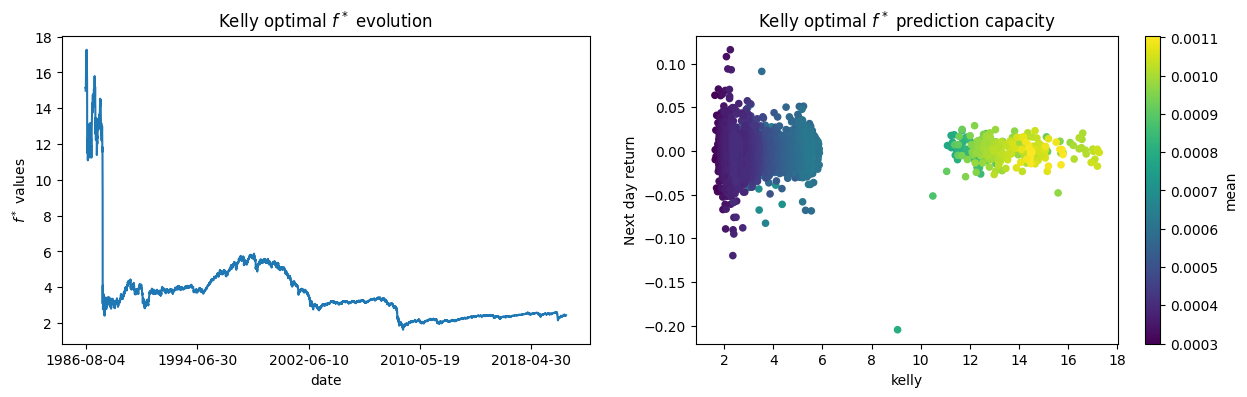

In [17]:
fig, ax = plt.subplots(ncols=2, figsize=(15, 4))

expanding_kelly.plot(ax=ax[0])
ax[0].set_ylabel('$f^*$ values');
ax[0].set_title('Kelly optimal $f^*$ evolution');

parameters_df.plot.scatter(
    x='kelly', y='Next day return', c='mean', colormap='viridis', ax=ax[1],
)
ax[1].set_title('Kelly optimal $f^*$ prediction capacity')

As we can see in the left graph the optimal $f^*$ has changed during time. Note that sometimes, mostly at the begining, reaches values greater than 4. Which means that we would need to leverage x4! This can be really risky and is a problem that has already being discussed in other [studies](https://www.stat.berkeley.edu/~aldous/157/Papers/Good_Bad_Kelly.pdf).

In the right graph we can see the "*predictive power*". As we can see greater Kelly values do not imply greater returns in the following day.


Taking into account that some allocations (with a leverage > $x5$) can be excesively risky, we will obtain different Kelly results setting different maximum leverages (1, 2, 3, 4, 5). Reducing the actual Kelly value also known as *Fractional Kelly* it's used in some cases since it has some benefitis, such as reduce losses or risks, see [here](https://www.researchgate.net/publication/247922818_The_Kelly_Criterion_in_Blackjack_Sports_Betting_and_the_Stock_Market).


In [18]:
all_returns_df = pd.DataFrame()

# set the leverages for 1 to 5
leverages = range(1, 6)

# returns starting in the first day available
first_date = expanding_kelly.index[0]
shift_returns_sp500 = shift_returns_sp500[first_date:]

for leverage in leverages:
    filter_kelly = filter_leverage(expanding_kelly, leverage)
    
    name = 'max_leverage_' + str(leverage)    
    all_returns_df[name] = shift_returns_sp500 * filter_kelly
    
all_returns_df['SP500'] = shift_returns_sp500
print(all_returns_df)

            max_leverage_1  max_leverage_2  max_leverage_3  max_leverage_4  \
date                                                                         
1986-08-04        0.004407        0.008814        0.013221        0.017628   
1986-08-05       -0.000802       -0.001603       -0.002405       -0.003206   
1986-08-06        0.000844        0.001689        0.002533        0.003378   
1986-08-07       -0.000675       -0.001350       -0.002025       -0.002700   
1986-08-08        0.016042        0.032084        0.048125        0.064167   
...                    ...             ...             ...             ...   
2020-10-12       -0.006307       -0.012614       -0.015465       -0.015465   
2020-10-13       -0.006623       -0.013246       -0.016205       -0.016205   
2020-10-14       -0.001528       -0.003056       -0.003729       -0.003729   
2020-10-15        0.000135        0.000270        0.000329        0.000329   
2020-10-16             NaN             NaN             NaN      

As we can see, when we set the maximum leverage to 1, the kelly returns are equal to the benchmark returns. On the other hand, with greater leverages you obtain greater and more volatile results up to the point where you reach a maximum leverage of $x5$ and you even loose money!

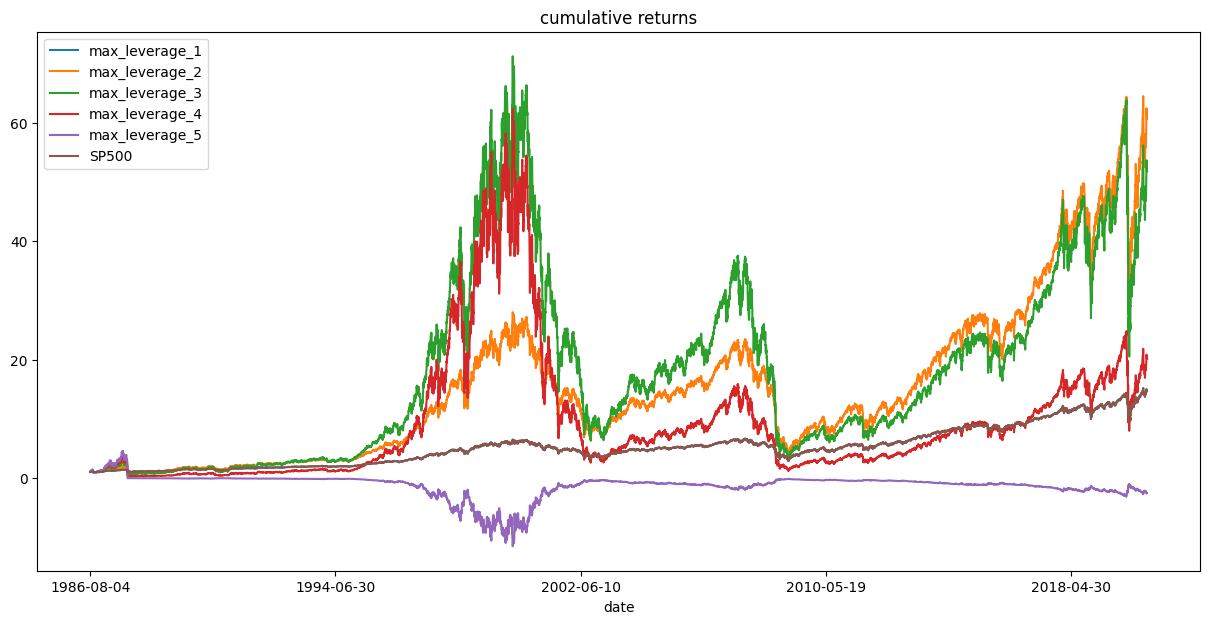

In [19]:
cum_returns = get_cumulative_returns(all_returns_df)

cum_returns.plot(figsize=(15, 7))
plt.title('cumulative returns');

## 3. Example with multiple securities

In this section we are going to see an example of the Kelly criterion with a portfolio of securities. To do so, I have arbitratily selected 15 US equities. 


The first thing we will need to do is to study their correlations, since the way we calculate the optimal fraction invested in each security variates depending on this assumption.

In [20]:
companies_df = pd.read_csv('stocks.csv', index_col='date', sep=';')
returns_df = companies_df.pct_change()
shift_returns = returns_df.shift(-1)

<Axes: >

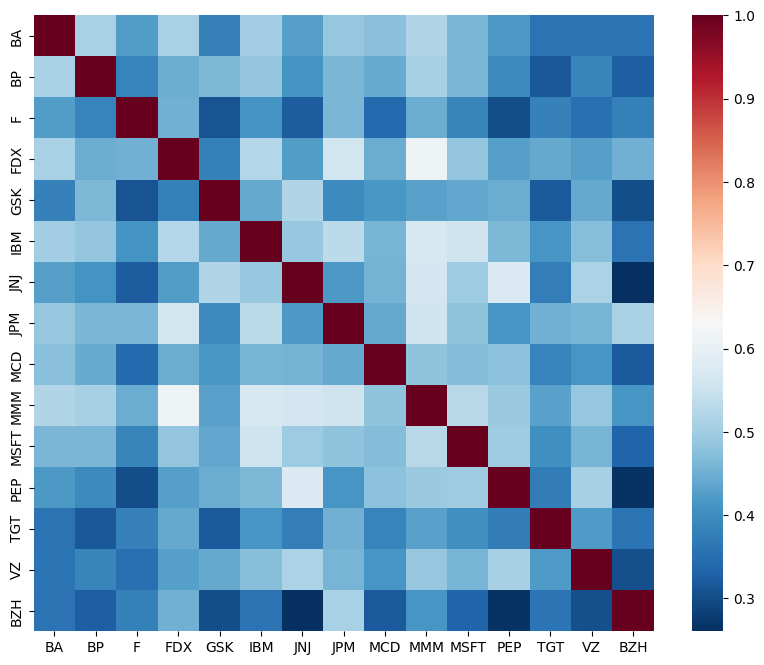

In [21]:
plt.figure(figsize=(10, 8))
sns.heatmap(returns_df.corr(), cmap="RdBu_r")

Well... we see some correlations, none of them greater than 0.5. Nevertheless, it is great enough to think that maybe we should calculate the optimal Kelly with both assumptions.


In order to limit the maximum leverage $\alpha$, so that $f_1^* + ... + f_15^* > \alpha$ we will do the following:

\begin{equation}
f_i^{**} = \alpha  \frac{f_i^*}{\sum_{i=1}^{15}f_i^*}
\end{equation}

### Correlated and uncorrelated

If we assume that the securities are correlated, then we will need to divide the vector of return excesses by the covariance matrix.


On the other hand, if we assume that the securities are not correlated, then the optimal allocation is the same that for one asset allocation.

In [22]:
# f* values for correlated securities
opt_correlated_kelly = get_kelly(returns_df, correlation=True)

# f* values for uncorrelated securities
opt_uncorrelated_kelly = get_kelly(returns_df, correlation=False)

# set parameters for the backtest
leverages = range(1, 6)
start_date = opt_correlated_kelly.index[0]
shift_returns = shift_returns[start_date:]

# make the backtest
total_returns_corr = backtest(opt_correlated_kelly, shift_returns, leverages)
total_returns_uncorr = backtest(opt_uncorrelated_kelly, shift_returns, leverages)

Furthermore, we will need compare our results with a *benchmark*. We will use two ways of selecting a benchmark:


1. We assume that our money is divided in equally weighted parts and don't touch we them again. For example if we have 1500€ we will invest 100€ in each security and leave it there.


2. We assume that everyday we reinvest all our money in equally weighted parts for all the securities. In this case, you would constantly update the weights, so that all the securities have always the same amount of money.

In [23]:
n_companies = len(shift_returns.columns)

# invest once and don't touch it again
cum_returns_ew = get_cumulative_returns(shift_returns)
cum_returns_ew = cum_returns_ew / n_companies
invest_once_equally_weight = cum_returns_ew.sum(axis=1)

# reinvest every day
total_returns_corr['reinvest_equally_weight'] = shift_returns.sum(axis=1) / n_companies
total_returns_uncorr['reinvest_equally_weight'] = shift_returns.sum(axis=1) / n_companies

# cumulative returns for correlated securities
cum_returns_corr = get_cumulative_returns(total_returns_corr)
cum_returns_corr['invest_once_equally_weight'] = invest_once_equally_weight

# cumulative returns for uncorrelated securities
cum_returns_uncorr = get_cumulative_returns(total_returns_uncorr)
cum_returns_uncorr['invest_once_equally_weight'] = invest_once_equally_weight

In the next graph we can see the evolution of the Kelly criterion for each security in the portfolio. Again, we can see some values greater than 4 and lower than 0. 

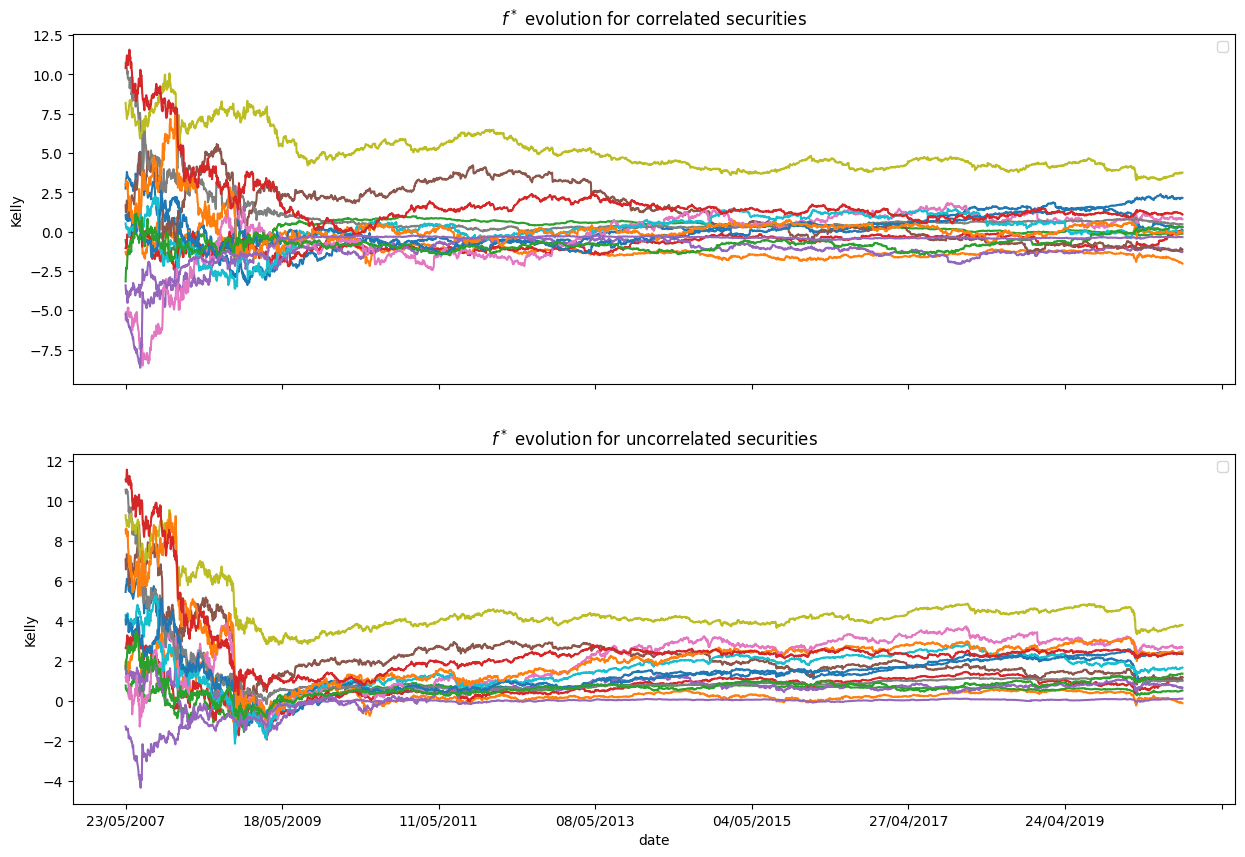

In [24]:
fig, ax = plt.subplots(nrows=2, figsize=(15, 10), sharex=True)

opt_correlated_kelly.plot(ax=ax[0])
ax[0].set_title('$f^*$ evolution for correlated securities');
ax[0].set_ylabel('Kelly');
ax[0].legend([]);

opt_uncorrelated_kelly.plot(ax=ax[1])
ax[1].set_title('$f^*$ evolution for uncorrelated securities');
ax[1].set_ylabel('Kelly');
ax[1].legend([]);

We will do the same, leverage from x1 to x5. Note that now we can short sell as well.  

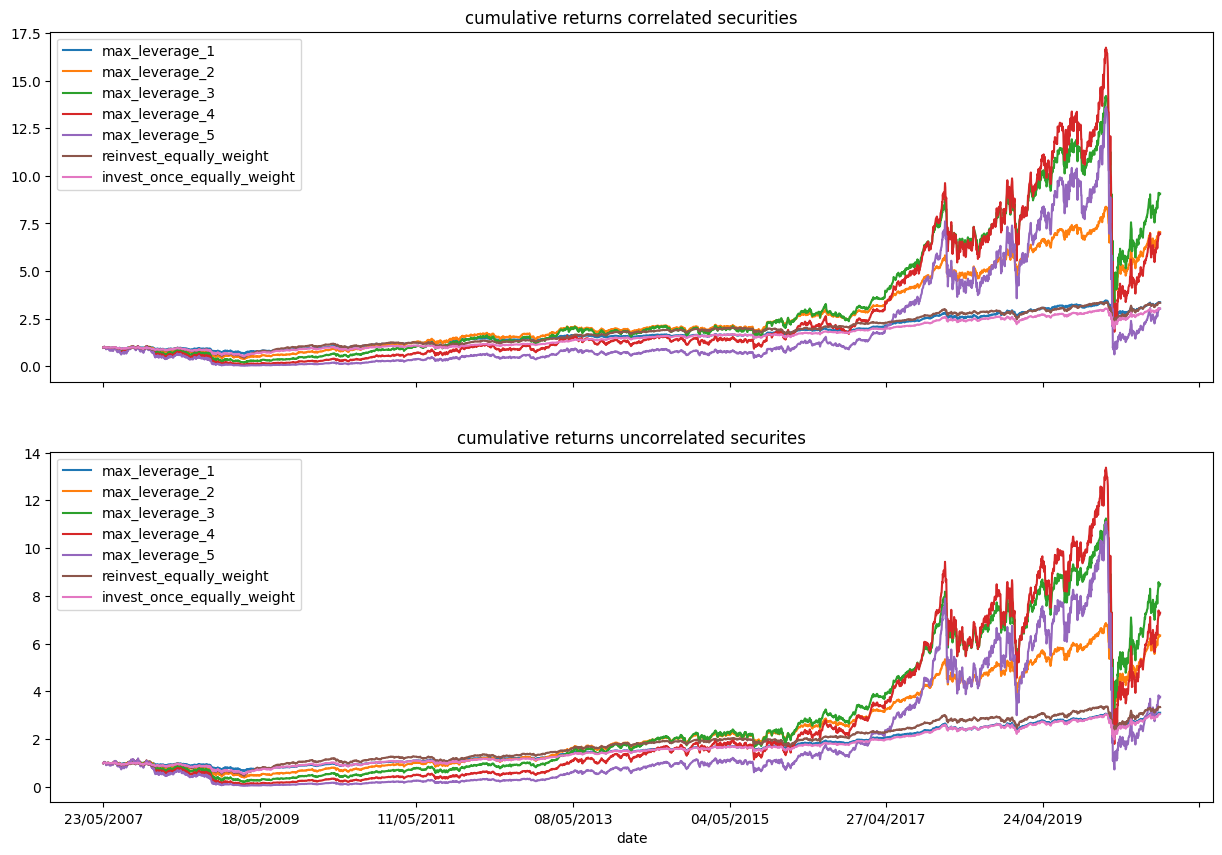

In [25]:
fig, ax = plt.subplots(nrows=2, figsize=(15, 10), sharex=True)

cum_returns_corr.plot(ax=ax[0])
ax[0].set_title('cumulative returns correlated securities');

cum_returns_uncorr.plot(ax=ax[1])
ax[1].set_title('cumulative returns uncorrelated securites');

### Key points from the notebook


1. It is really interesting to see the efect of reducing the amount of leverage possible. In most of the cases leverage greater than 5 has end up in losses. 


2. On the other hand, a maximum leverage of 1, even though it doesn't get the best results in terms of cumulative returns, has lower volatility than the rest with consistent returns.


## 4. Discusison, problems and further analysis.

We have made a small review of the Kelly criterion for continuous variables. However, there are many questions and further analyses to be made in order to improve our understanding of the optimal allocation in the stock market. Some of them are:

- To solve the problem of high values of Kelly, which leads to riskier positions, we have limited the amount of possible leverage, although we could have done other things, such as reducing the Kelly value by multiplying by a constant $C$ such that $0 < C < 1$.


- Financial series are, of course, not stationary. This can lead to some problems when estimating $m$ and $s^2$. We have decided to estimate these parameters with the expanding mean and variance, but we could try to do it rolling or even try to predict the future variance or returns with a model.


## References

> Thorp, E. O. (2011). 'The Kelly criterion in blackjack sports betting, and the stock market. In The Kelly Capital Growth Investment Criterion: Theory and Practice' (pp. 789-832).



> MacLean, L. C., Thorp, E. O., & Ziemba, W. T. (2010). Good and bad properties of the Kelly criterion. Risk, 20(2), 1.



> Khanna, N. (2016). The Kelly Criterion and the Stock Market.



> Browne, S., & Whitt, W. (1996). Portfolio choice and the Bayesian Kelly criterion. Advances in Applied Probability, 1145-1176.



> Davis, M., & Lleo, S. (2013). Fractional Kelly strategies in continuous time: Recent developments. In Handbook of the Fundamentals of Financial Decision Making: Part II (pp. 753-787).